Importing the Dependencies

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re


Data collection

In [306]:
df = pd.read_csv("Tweets.csv")
df.head(8)

,tweet_id,airline,name,retweet_count,tweet_text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,5.703002e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)


In [307]:
df.shape

(14640, 9)

In [308]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
tweet_text            0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

In [309]:
df = pd.DataFrame(df["tweet_text"])
df

,tweet_text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


Cleaning the text

In [310]:
#Function for tweet text cleaning
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removes @mentions
    text = re.sub(r'#','',text) #removes '#' symbol
    text = re.sub(r'https?:\/\/\S+','',text) #removes URLs

    return text

df["tweet_text"] = df["tweet_text"].apply(cleanText)
df

,tweet_text
0,What said.
1,plus you've added commercials to the experien...
2,I didn't today... Must mean I need to take an...
3,"it's really aggressive to blast obnoxious ""en..."
4,and it's a really big bad thing about it
...,...
14635,thank you we got on a different flight to Chi...
14636,leaving over 20 minutes Late Flight. No warni...
14637,Please bring American Airlines to BlackBerry10
14638,"you have my money, you change my flight, and ..."


In [311]:
#Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a column with subjectivity
df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)

#Create a column with polarity
df['Polarity'] = df['tweet_text'].apply(getPolarity)

#show new dataframe
df

,tweet_text,Subjectivity,Polarity
0,What said.,0.000000,0.000000
1,plus you've added commercials to the experien...,0.000000,0.000000
2,I didn't today... Must mean I need to take an...,0.687500,-0.390625
3,"it's really aggressive to blast obnoxious ""en...",0.350000,0.006250
4,and it's a really big bad thing about it,0.383333,-0.350000
...,...,...,...
14635,thank you we got on a different flight to Chi...,0.600000,0.000000
14636,leaving over 20 minutes Late Flight. No warni...,0.600000,-0.300000
14637,Please bring American Airlines to BlackBerry10,0.000000,0.000000
14638,"you have my money, you change my flight, and ...",0.375000,-0.125000


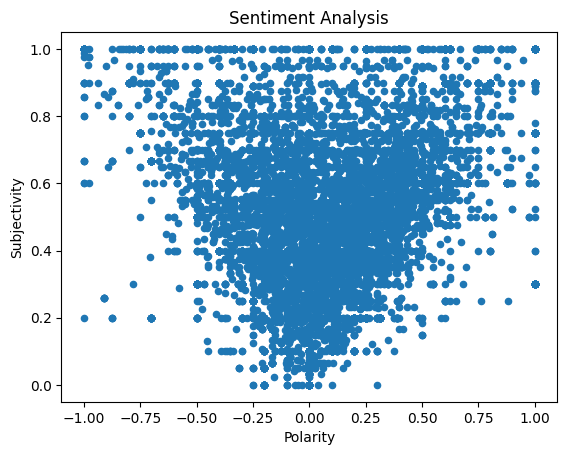

In [312]:
#Polarity and Subjectivity of the first 2000 tweets
plt.scatter(df['Polarity'],df['Subjectivity'] , s=20)
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [313]:
#classifying the sentiment from the polarity
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(20)

,tweet_text,Subjectivity,Polarity,Sentiment
0,What said.,0.000000,0.000000,Neutral
1,plus you've added commercials to the experien...,0.000000,0.000000,Neutral
2,I didn't today... Must mean I need to take an...,0.687500,-0.390625,Negative
3,"it's really aggressive to blast obnoxious ""en...",0.350000,0.006250,Positive
4,and it's a really big bad thing about it,0.383333,-0.350000,Negative
5,seriously would pay $30 a flight for seats th...,0.633333,-0.208333,Negative
6,"yes, nearly every time I fly VX this “ear wor...",0.766667,0.466667,Positive
7,Really missed a prime opportunity for Men Wit...,0.200000,0.200000,Positive
8,"Well, I didn't…but NOW I DO! :-D",1.000000,1.000000,Positive
9,"it was amazing, and arrived an hour early. Yo...",0.600000,0.466667,Positive


Positive tweets

In [314]:
ptweets = df[df.Sentiment=='Positive']
ptweets = ptweets['tweet_text']

ptweets

3         it's really aggressive to blast obnoxious "en...
6         yes, nearly every time I fly VX this “ear wor...
7         Really missed a prime opportunity for Men Wit...
8                         Well, I didn't…but NOW I DO! :-D
9         it was amazing, and arrived an hour early. Yo...
                               ...                        
14629     How do I change my flight if the phone system...
14630                                       Thanks! He is.
14632    “:  George, that doesn't look good. Please fol...
14634                        right on cue with the delays👌
14639     we have 8 ppl so we need 2 know how many seat...
Name: tweet_text, Length: 5478, dtype: object

In [315]:
#number of positive tweets
pcounts = ptweets.count()
pcounts 

5478

In [316]:
#Percentage of positive tweets
print("Percentage of positive tweets: {:.2f}%".format(pcounts/df['tweet_text'].count()*100))

Percentage of positive tweets: 37.42%


Negative tweets

In [317]:
negtweets = df[df.Sentiment=='Negative']
negtweets = negtweets['tweet_text']

negtweets.values

array([" I didn't today... Must mean I need to take another trip!",
       " and it's a really big bad thing about it",
       " seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
       ...,
       ' thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.',
       " leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       " you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [318]:
#number of negative tweets
negcounts = negtweets.count()
negcounts

3671

In [319]:
print("Percentage of Negative tweets: {:.2f}%".format(negcounts/df['tweet_text'].count()*100))

Percentage of Negative tweets: 25.08%


Neutral Tweets

In [320]:
NeutralTweets = df[df.Sentiment=='Neutral']
NeutralTweets = NeutralTweets['tweet_text']

NeutralTweets.values

array([' What  said.',
       " plus you've added commercials to the experience... tacky.",
       ' did you know that suicide is the second leading cause of death among teens 10-24',
       ...,
       ' my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.',
       ' thank you we got on a different flight to Chicago.',
       ' Please bring American Airlines to BlackBerry10'], dtype=object)

In [321]:
#number of neutral tweets
Neutralcounts = NeutralTweets.count()
Neutralcounts

5491

In [322]:
print("Percentage of neutral tweets: {:.2f}%".format(Neutralcounts/df['tweet_text'].count()*100))

Percentage of neutral tweets: 37.51%


Visualize the counts

(0.0, 10000.0)

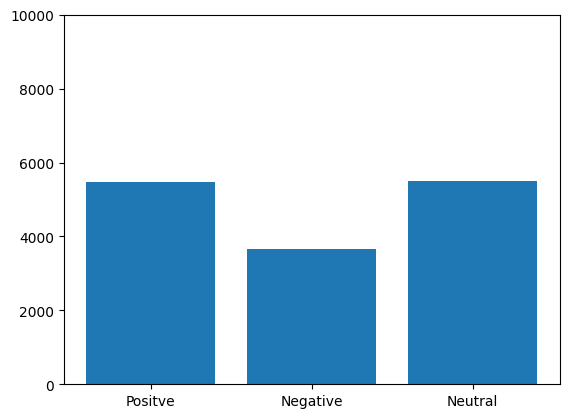

In [323]:
plt.bar(x=["Positve",'Negative',"Neutral"], height=[pcounts,negcounts,Neutralcounts])
plt.ylim(0,10000)

Tweet Clustering

In [324]:
from sklearn.cluster import KMeans
inertias = []
X = df.iloc[:,[1,2]].values # getting the Subjectivity and Polarity column values
X

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.6875    , -0.390625  ],
       ...,
       [ 0.        ,  0.        ],
       [ 0.375     , -0.125     ],
       [ 0.16666667,  0.16666667]])

In [325]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

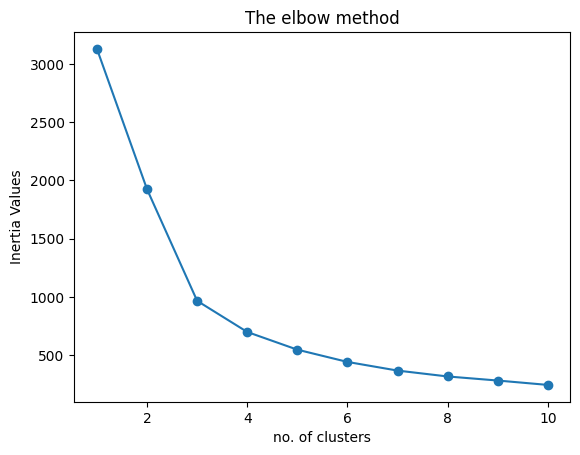

In [326]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('Inertia Values')
plt.show()

In [327]:
#By elbow method best number of clusters = 3
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [328]:
y_pred = kmeans_model.fit_predict(X)
y_predDF = pd.DataFrame(y_pred)
PTweets = y_predDF[y_predDF==1]
PTweets.count()

0    7787
dtype: int64

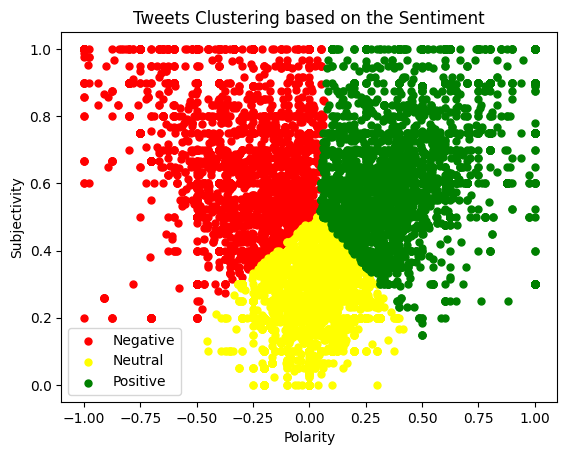

In [329]:
plt.scatter(X[y_pred==0,1], X[y_pred==0,0], s=25, c="red", label='Negative')
plt.scatter(X[y_pred==1,1], X[y_pred==1,0], s=25, c="yellow", label='Neutral')
plt.scatter(X[y_pred==2,1], X[y_pred==2,0], s=25, c="green", label='Positive')
plt.title("Tweets Clustering based on the Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend()
plt.show()